# Introduction to Customer Segmentation in Python

Welcome to this project! We will be analyzing a customer transaction dataset in order to investigate and interpret customer behaviourof a certain supplier.

We will be doing exploratory data analysis on our data, before employing a variety of dimensionality reduction techniques, ranging from introductory to more advanced. We will visualize our new representation, before clustering our customers based on their behaviour. Finally, we will visualize our clusters in an interactive way to analyze them and their differences more thoroughly.

## Prerequisites
- Basic level knowledge of Python (for example, NumPy and Pandas)
- Basic understanding of machine learning (what dimensionality reduction is, for example)
- Experience with some plotting libraries can help some understanding, for example Matplotlib (or Seaborn)

## Project Outline
**Task 1**: Introduction (this section)

**Task 2**: Exploratory Data Analysis

**Task 3**: Principal Component Analysis

**Task 4**: Kernel Principal Component Analysis

**Task 5**: K-Means Clustering with Elbow Method

**Task 6**: Interactive Cluster Analysis



## Task 1: Introduction
[This is the dataset](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) we will be using. It is collated by Margarida G. M. S. Cardoso, and comprises annual spending across different types of retail products (for example, Frozen, Grocery, Delicatessen, etc.). We will use unsupervised methods to reduce the dimensionality of this data, and plot the resulting 2-D data, and investigate what our models are learning.

### Additional reading material
These are the concepts and tool we will use in this project.

- [Principal Component Analysis (PCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- [Kernel Principal Component Analysis (KPCA)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html)
- [K-Means Clustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

In [1]:
import pandas as pd
import numpy as np

import matplotlib
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

import plotly.graph_objects as go

In [2]:
df=pd.read_csv('Data/Wholesale customers data.csv')
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

### Rename 'Delicassen' column + Change categorical columns from number to strring

In [3]:
df = df.rename(columns = {'Delicassen': 'Delicatessen'})
df['Channel'] = df['Channel'].map({1:'HoReCa', 2:'Reatail'})
df['Region'] = df['Region'].map({1:'Lisbon', 2:'Porto', 3:'Others'})
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Reatail  Others  12669   9656     7561     214              2674   
1    Reatail  Others   7057   9810     9568    1762              3293   
2    Reatail  Others   6353   8808     7684    2405              3516   
3     HoReCa  Others  13265   1196     4221    6404               507   
4    Reatail  Others  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435   HoReCa  Others  29703  12051    16027   13135               182   
436   HoReCa  Others  39228   1431      764    4510                93   
437  Reatail  Others  14531  15488    30243     437             14841   
438   HoReCa  Others  10290   1981     2232    1038               168   
439   HoReCa  Others   2787   1698     2510      65               477   

     Delicatessen  
0            1338  
1            1776  
2            7844  
3            1788  
4            5185  
..            ...  
435          2204  
436          2346  
437          1867  
438          2125  
439            52  

[440 rows x 8 columns]

In [4]:
df.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [5]:
features = ['Channel',
 #'Region',
 #'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [6]:
df[features].describe()

Milk       Grocery        Frozen  Detergents_Paper  \
count    440.000000    440.000000    440.000000        440.000000   
mean    5796.265909   7951.277273   3071.931818       2881.493182   
std     7380.377175   9503.162829   4854.673333       4767.854448   
min       55.000000      3.000000     25.000000          3.000000   
25%     1533.000000   2153.000000    742.250000        256.750000   
50%     3627.000000   4755.500000   1526.000000        816.500000   
75%     7190.250000  10655.750000   3554.250000       3922.000000   
max    73498.000000  92780.000000  60869.000000      40827.000000   

       Delicatessen  
count    440.000000  
mean    1524.870455  
std     2820.105937  
min        3.000000  
25%      408.250000  
50%      965.500000  
75%     1820.250000  
max    47943.000000

In [7]:
df.to_csv('Data/data_processed.csv')

## Task 2: Exploratory Data Analysis
Let's take a closer look at our data!

In [8]:
df=pd.read_csv('Data/data_processed.csv', index_col=0)
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Reatail  Others  12669   9656     7561     214              2674   
1    Reatail  Others   7057   9810     9568    1762              3293   
2    Reatail  Others   6353   8808     7684    2405              3516   
3     HoReCa  Others  13265   1196     4221    6404               507   
4    Reatail  Others  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435   HoReCa  Others  29703  12051    16027   13135               182   
436   HoReCa  Others  39228   1431      764    4510                93   
437  Reatail  Others  14531  15488    30243     437             14841   
438   HoReCa  Others  10290   1981     2232    1038               168   
439   HoReCa  Others   2787   1698     2510      65               477   

     Delicatessen  
0            1338  
1            1776  
2            7844  
3            1788  
4            5185  
..            ...  
435          2204  
436          2346  
437          1867  
438          2125  
439            52  

[440 rows x 8 columns]

In [9]:
df.Region.value_counts()

Others    316
Lisbon     77
Porto      47
Name: Region, dtype: int64

In [10]:
df.Channel.value_counts()

HoReCa     298
Reatail    142
Name: Channel, dtype: int64

In [11]:
df.columns.tolist()

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [12]:
features = ['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

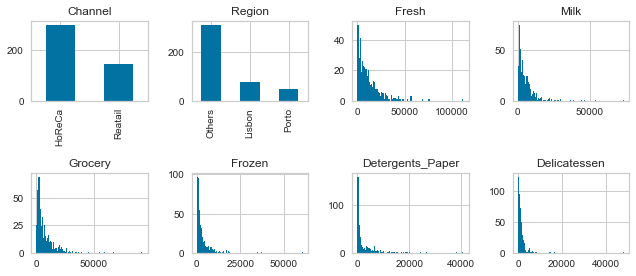

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(9, 4))
for feature, ax in zip(features, axes.ravel()):
    if (feature=='Channel') | (feature=='Region'):
        df[feature].value_counts().plot.bar(ax=ax)
    else:
        ax.hist(df[feature], bins=100)
    ax.set_title(feature)
plt.tight_layout()

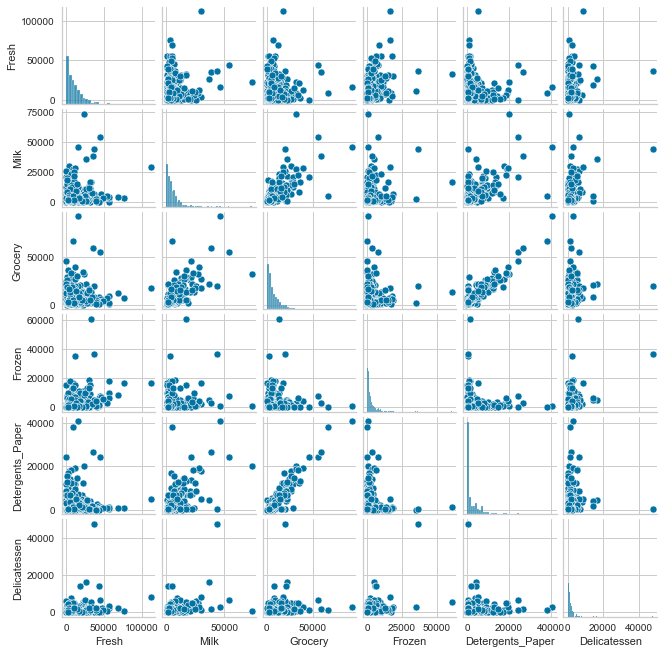

In [14]:
pplot= sns.pairplot(df, vars=features[2:])
pplot.fig.set_size_inches(9,9)

## Task 3: Principal Component Analysis
Let's go over some PCA theory, and see how it works!

In [15]:
df=pd.read_csv('Data/data_processed.csv', index_col=0)
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Reatail  Others  12669   9656     7561     214              2674   
1    Reatail  Others   7057   9810     9568    1762              3293   
2    Reatail  Others   6353   8808     7684    2405              3516   
3     HoReCa  Others  13265   1196     4221    6404               507   
4    Reatail  Others  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435   HoReCa  Others  29703  12051    16027   13135               182   
436   HoReCa  Others  39228   1431      764    4510                93   
437  Reatail  Others  14531  15488    30243     437             14841   
438   HoReCa  Others  10290   1981     2232    1038               168   
439   HoReCa  Others   2787   1698     2510      65               477   

     Delicatessen  
0            1338  
1            1776  
2            7844  
3            1788  
4            5185  
..            ...  
435          2204  
436          2346  
437          1867  
438          2125  
439            52  

[440 rows x 8 columns]

In [16]:
features = [#'Channel',
 #'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicatessen']

In [17]:
data=df[features].to_numpy()
data.shape

(440, 6)

In [18]:
scaler = StandardScaler()
data=scaler.fit_transform(data)
data[:, 0].std()

1.0

In [19]:
data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [20]:
np.save('Data/training_data.npy', data)

In [21]:
pca = PCA(n_components = 2)
result_pca = pca.fit_transform(data)

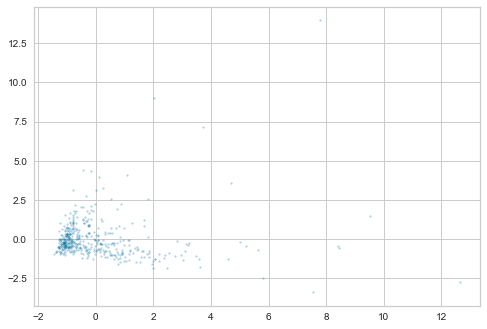

In [22]:
plt.scatter(result_pca[:,0], result_pca[:,1], s=3, alpha=0.3)

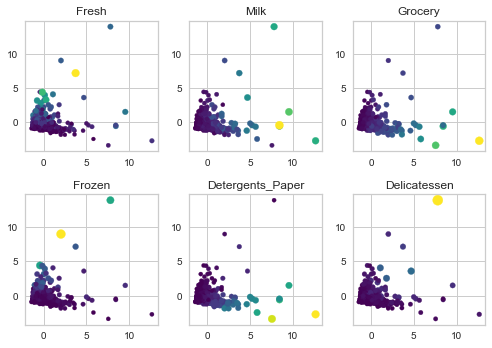

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(7, 5))

for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    sizes = 20+5*data[:, features.index(feature)]
    cols = df[feature]
    ax.scatter(result_pca[:,0], result_pca[:,1], s=sizes, c=cols, cmap=cmap)
    ax.set_title(feature)
plt.tight_layout()

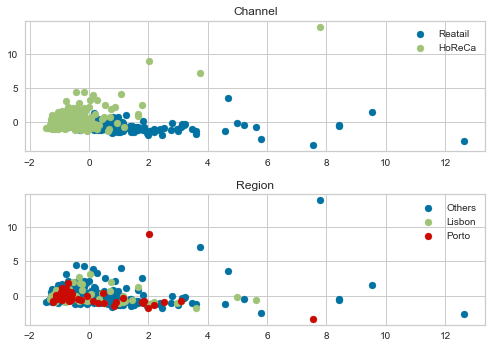

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(7, 5))

for feature, ax in zip(['Channel', 'Region'], axes.ravel()):
    cmap = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(result_pca[df[feature]==unique_val,0], result_pca[df[feature]==unique_val,1], label=unique_val)
        ax.set_title(feature)
        ax.legend()
plt.tight_layout()

## Task 4: Kernel Principal Component Analysis
Let's go over some [KPCA theory](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html), and see see if it works better than standard PCA.

In [25]:
df = pd.read_csv('Data/data_processed.csv', index_col=0)
data = np.load('Data/training_data.npy')

## Polynomial Function

In [26]:
kpca = KernelPCA(n_components=2, kernel='poly', degree=2)
result_kpca_poly = kpca.fit_transform(data)

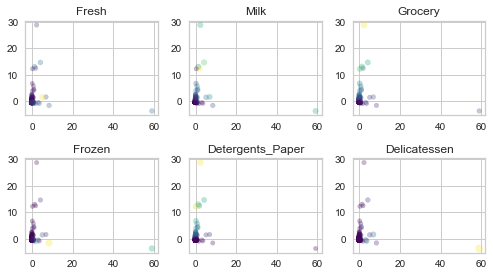

In [27]:
fig, axes = plt.subplots(2, 3, figsize=(7, 4))

for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    sizes = 20+2*data[:, features.index(feature)]
    ax.scatter(result_kpca_poly[:, 0], result_kpca_poly[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cmap)
    ax.set_title(feature)
plt.tight_layout()

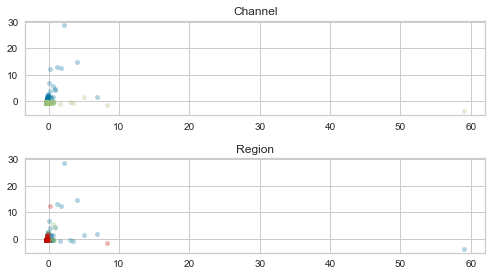

In [28]:
fig, axes = plt.subplots(2, 1, figsize=(7, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(result_kpca_poly[df[feature]==unique_val, 0], result_kpca_poly[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Radial Basis Function

In [29]:
kpca = KernelPCA(n_components=2, kernel='rbf')
result_kpca_rbf = kpca.fit_transform(data)

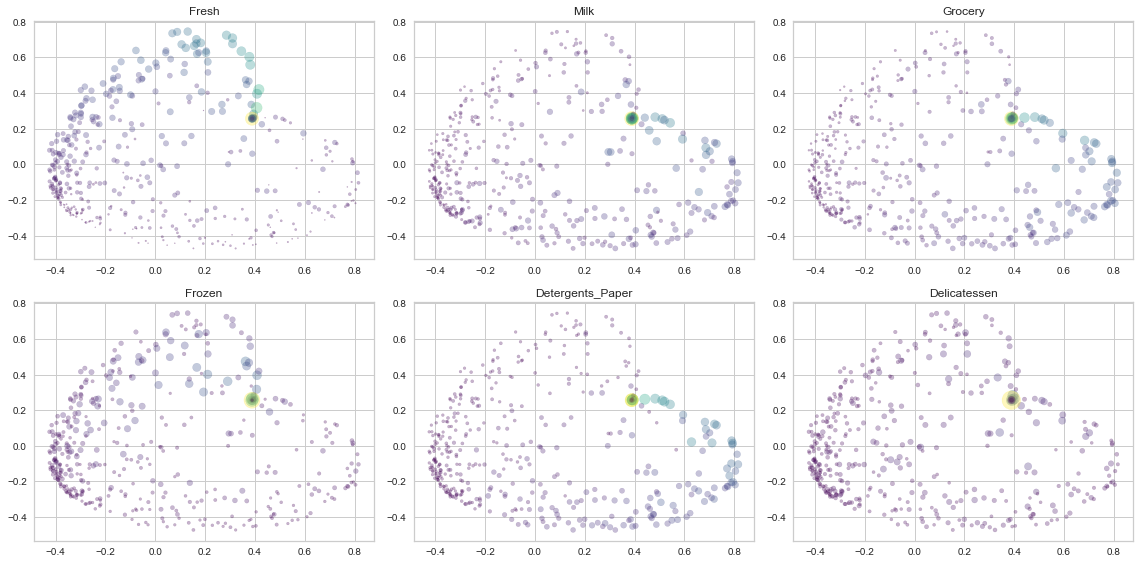

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(result_kpca_rbf[:, 0], result_kpca_rbf[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

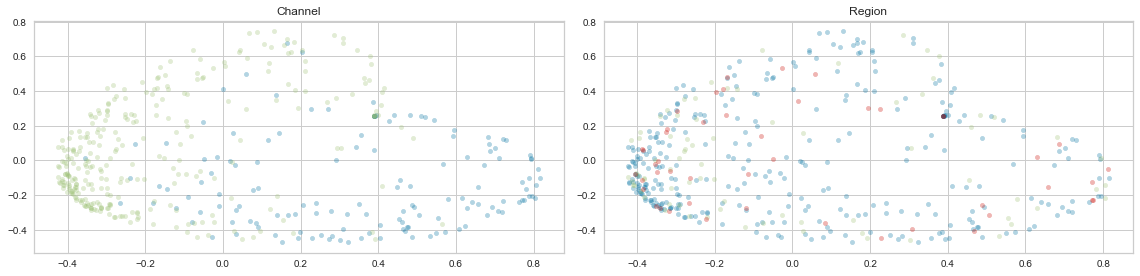

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(result_kpca_rbf[df[feature]==unique_val, 0], result_kpca_rbf[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Cosine Function

In [32]:
kpca = KernelPCA(n_components=2, kernel='cosine')
result_kpca_cos = kpca.fit_transform(data)

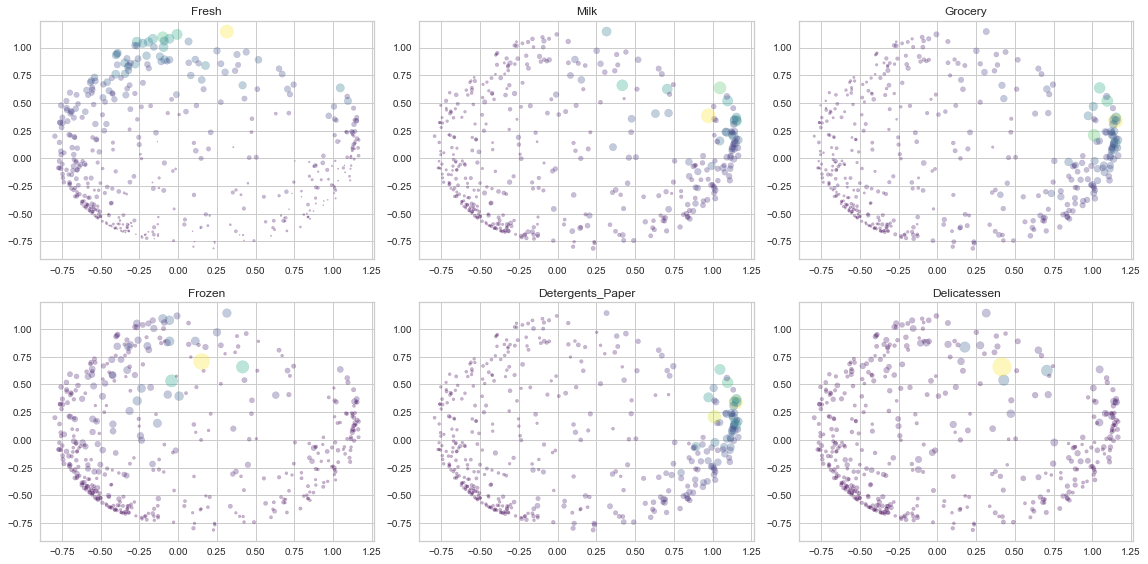

In [33]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cols = 'viridis'
    sizes = 20+20*data[:, features.index(feature)]
    ax.scatter(result_kpca_cos[:, 0], result_kpca_cos[:, 1], s=sizes, alpha=0.3, c=df[feature], cmap=cols)
    ax.set_title(feature)
plt.tight_layout()

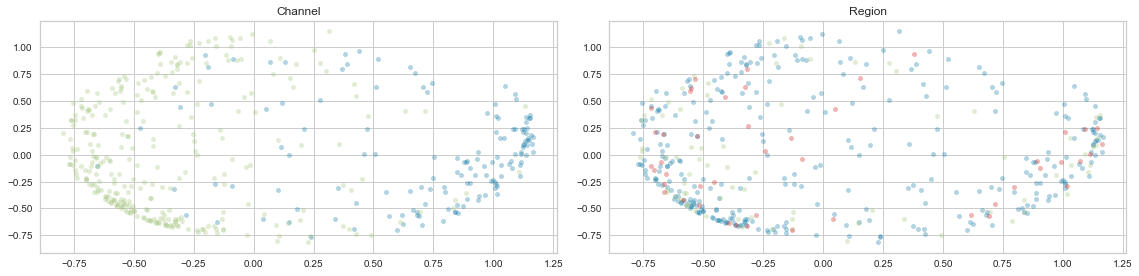

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
for feature, ax in zip(['Channel', 'Region'], axes):
    cols = 'Pastel1'
    sizes = 20
    for unique_val in df[feature].unique():
        ax.scatter(result_kpca_cos[df[feature]==unique_val, 0], result_kpca_cos[df[feature]==unique_val, 1], s=20, alpha=0.3)
        ax.set_title(feature)
plt.tight_layout()

## Append to DataFrame

In [35]:
df['x_kpca_poly'] = result_kpca_poly[:, 0]
df['y_kpca_poly'] = result_kpca_poly[:, 1]

df['x_kpca_rbf'] = result_kpca_rbf[:, 0]
df['y_kpca_rbf'] = result_kpca_rbf[:, 1]

df['x_kpca_cos'] = result_kpca_cos[:, 0]
df['y_kpca_cos'] = result_kpca_cos[:, 1]

In [36]:
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0    Reatail  Others  12669   9656     7561     214              2674   
1    Reatail  Others   7057   9810     9568    1762              3293   
2    Reatail  Others   6353   8808     7684    2405              3516   
3     HoReCa  Others  13265   1196     4221    6404               507   
4    Reatail  Others  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435   HoReCa  Others  29703  12051    16027   13135               182   
436   HoReCa  Others  39228   1431      764    4510                93   
437  Reatail  Others  14531  15488    30243     437             14841   
438   HoReCa  Others  10290   1981     2232    1038               168   
439   HoReCa  Others   2787   1698     2510      65               477   

     Delicatessen  x_kpca_poly  y_kpca_poly  x_kpca_rbf  y_kpca_rbf  \
0            1338    -0.298146    -0.307672    0.078374   -0.173115   
1            1776    -0.272613    -0.248762    0.185813   -0.307415   
2            7844     0.557870    -0.356102    0.341702    0.075048   
3            1788    -0.263419    -0.454023   -0.253304    0.250352   
4            5185     0.126922    -0.432733    0.136617    0.375279   
..            ...          ...          ...         ...         ...   
435          2204     0.319105    -0.223157    0.376162    0.466779   
436          2346    -0.199863    -0.452928    0.130231    0.745111   
437          1867    -0.077851     2.473393    0.720747    0.122400   
438          2125    -0.312088    -0.434577   -0.352004   -0.033909   
439            52    -0.259689    -0.434773   -0.343427   -0.268287   

     x_kpca_cos  y_kpca_cos  
0      0.504789    0.009622  
1      0.889941   -0.262833  
2      0.473994    0.235687  
3     -0.618611    0.370131  
4      0.068900    0.861829  
..          ...         ...  
435    0.251200    0.970344  
436   -0.400170    0.931981  
437    1.135432    0.306253  
438   -0.594661   -0.179908  
439   -0.370289   -0.631223  

[440 rows x 14 columns]

In [37]:
df.to_csv('Data/data_with_latent.csv')

## Task 5: K-Means Clustering
We'll talk about the [K-Means Clustering Algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), and how we can use the [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) to help us out. 

In [38]:
df = pd.read_csv('Data/data_with_latent.csv', index_col=0)
data = np.load('Data/training_data.npy')

In [39]:
result_kpca = df[['x_kpca_cos', 'y_kpca_cos']].to_numpy()

In [40]:
clusterer = KMeans(n_clusters=5)
clusters = clusterer.fit_predict(result_kpca)

In [41]:
clusters[:5]

array([4, 2, 2, 3, 1])

In [42]:
markers = list('*hH+xXDd|.,ov^<>12348spP')

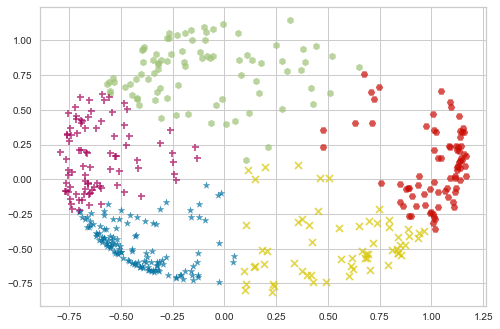

In [43]:
for cluster in np.unique(clusters):
    cluster_data = result_kpca[clusters==cluster]
    plt.scatter(
        cluster_data[:,0],
        cluster_data[:,1],
        alpha=0.7,
        marker=markers[cluster]
    )

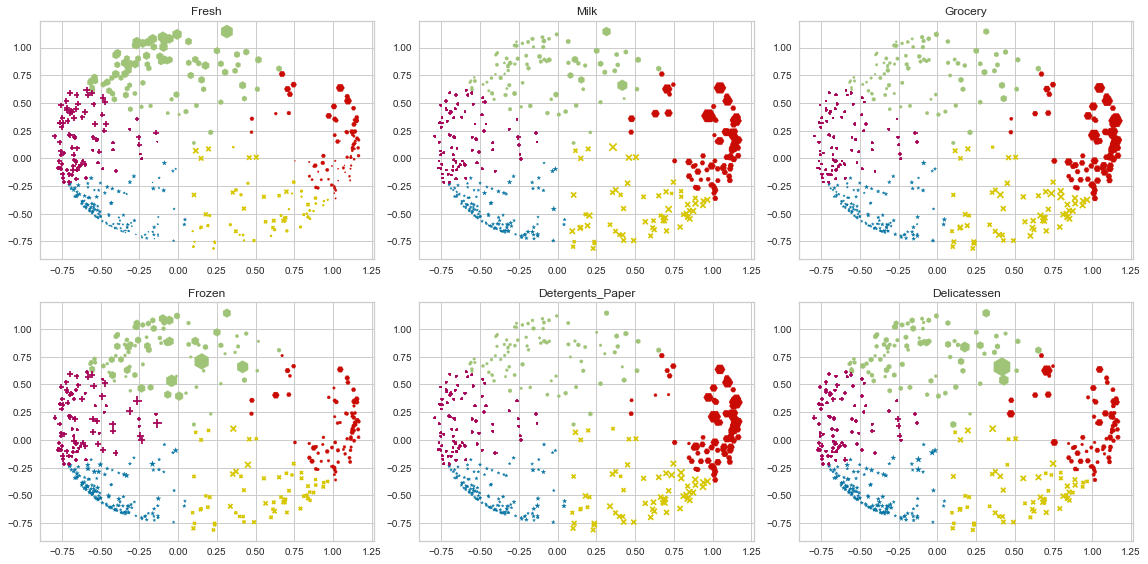

In [44]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    for cluster in np.unique(clusters):
        cluster_data = result_kpca[clusters==cluster]
        sizes = 20+20*data[:, features.index(feature)][clusters==cluster]
        ax.scatter(
            cluster_data[:,0],
            cluster_data[:,1],
            s=sizes,
            alpha=1,
            cmap=cmap,
            marker=markers[cluster])
    ax.set_title(feature)
plt.tight_layout()

In [45]:
df['cluster_kpca_cos'] = clusters
df.to_csv('Data/data_with_clusters.csv')

## Elbow Method

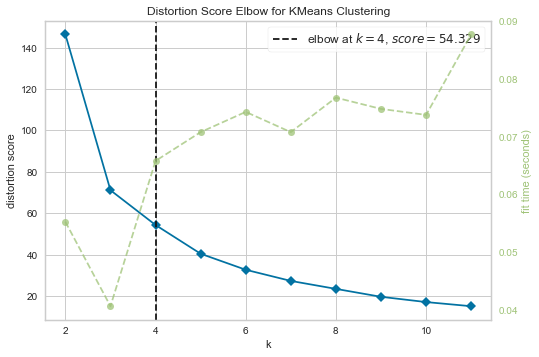

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 12), metric='distortion')
visualizer.fit(result_kpca)
visualizer.show()

## Task 6: Interactive Cluster Analysis
Let's see if there's a ncier way for us to compare our separate clusters.

In [47]:
df = pd.read_csv('Data/data_with_clusters.csv', index_col=0)
data = np.load('Data/training_data.npy')

In [48]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0  Reatail  Others  12669  9656     7561     214              2674   
1  Reatail  Others   7057  9810     9568    1762              3293   
2  Reatail  Others   6353  8808     7684    2405              3516   
3   HoReCa  Others  13265  1196     4221    6404               507   
4  Reatail  Others  22615  5410     7198    3915              1777   

   Delicatessen  x_kpca_poly  y_kpca_poly  x_kpca_rbf  y_kpca_rbf  x_kpca_cos  \
0          1338    -0.298146    -0.307672    0.078374   -0.173115    0.504789   
1          1776    -0.272613    -0.248762    0.185813   -0.307415    0.889941   
2          7844     0.557870    -0.356102    0.341702    0.075048    0.473994   
3          1788    -0.263419    -0.454023   -0.253304    0.250352   -0.618611   
4          5185     0.126922    -0.432733    0.136617    0.375279    0.068900   

   y_kpca_cos  cluster_kpca_cos  
0    0.009622                 4  
1   -0.262833                 2  
2    0.235687                 2  
3    0.370131                 3  
4    0.861829                 1

## Cluster Distribution

In [49]:
features

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

In [50]:
print(df.groupby(['cluster_kpca_cos','Channel', 'Region'])[features].mean())

                                        Fresh          Milk       Grocery  \
cluster_kpca_cos Channel Region                                             
0                HoReCa  Lisbon   5782.727273   2290.954545   2583.727273   
                         Others   4598.402299   2407.931034   2611.977011   
                         Porto    5519.545455   1699.000000   4340.636364   
                 Reatail Lisbon   2790.000000   2527.000000   5265.000000   
                         Others  10750.000000   3468.666667   6065.333333   
                         Porto    7839.000000   2548.000000   6110.000000   
1                HoReCa  Lisbon  35193.000000   4892.444444   6189.333333   
                         Others  31793.320755   5450.981132   5623.056604   
                         Porto   26384.600000   5587.000000   6473.400000   
                 Reatail Lisbon  15927.000000   5955.000000   7413.500000   
                         Others  23481.857143   6154.142857   9168.928571   

In [51]:
df.groupby('cluster_kpca_cos').count()

Channel  Region  Fresh  Milk  Grocery  Frozen  \
cluster_kpca_cos                                                  
0                     126     126    126   126      126     126   
1                      86      86     86    86       86      86   
2                      80      80     80    80       80      80   
3                      86      86     86    86       86      86   
4                      62      62     62    62       62      62   

                  Detergents_Paper  Delicatessen  x_kpca_poly  y_kpca_poly  \
cluster_kpca_cos                                                             
0                              126           126          126          126   
1                               86            86           86           86   
2                               80            80           80           80   
3                               86            86           86           86   
4                               62            62           62           62   

                  x_kpca_rbf  y_kpca_rbf  x_kpca_cos  y_kpca_cos  
cluster_kpca_cos                                                  
0                        126         126         126         126  
1                         86          86          86          86  
2                         80          80          80          80  
3                         86          86          86          86  
4                         62          62          62          62

In [52]:
clusters = df.cluster_kpca_cos.tolist()

In [53]:
df_normalized = df.copy(deep=True)
df_normalized[features] = df_normalized[features]/df_normalized[features].max()

In [54]:
df_normalized

Channel  Region     Fresh      Milk   Grocery    Frozen  \
0    Reatail  Others  0.112964  0.131378  0.081494  0.003516   
1    Reatail  Others  0.062924  0.133473  0.103126  0.028947   
2    Reatail  Others  0.056647  0.119840  0.082820  0.039511   
3     HoReCa  Others  0.118278  0.016273  0.045495  0.105210   
4    Reatail  Others  0.201648  0.073607  0.077581  0.064318   
..       ...     ...       ...       ...       ...       ...   
435   HoReCa  Others  0.264848  0.163964  0.172742  0.215791   
436   HoReCa  Others  0.349778  0.019470  0.008235  0.074094   
437  Reatail  Others  0.129566  0.210727  0.325965  0.007179   
438   HoReCa  Others  0.091751  0.026953  0.024057  0.017053   
439   HoReCa  Others  0.024850  0.023103  0.027053  0.001068   

     Detergents_Paper  Delicatessen  x_kpca_poly  y_kpca_poly  x_kpca_rbf  \
0            0.065496      0.027908    -0.298146    -0.307672    0.078374   
1            0.080657      0.037044    -0.272613    -0.248762    0.185813   
2            0.086119      0.163611     0.557870    -0.356102    0.341702   
3            0.012418      0.037294    -0.263419    -0.454023   -0.253304   
4            0.043525      0.108149     0.126922    -0.432733    0.136617   
..                ...           ...          ...          ...         ...   
435          0.004458      0.045971     0.319105    -0.223157    0.376162   
436          0.002278      0.048933    -0.199863    -0.452928    0.130231   
437          0.363509      0.038942    -0.077851     2.473393    0.720747   
438          0.004115      0.044323    -0.312088    -0.434577   -0.352004   
439          0.011683      0.001085    -0.259689    -0.434773   -0.343427   

     y_kpca_rbf  x_kpca_cos  y_kpca_cos  cluster_kpca_cos  
0     -0.173115    0.504789    0.009622                 4  
1     -0.307415    0.889941   -0.262833                 2  
2      0.075048    0.473994    0.235687                 2  
3      0.250352   -0.618611    0.370131                 3  
4      0.375279    0.068900    0.861829                 1  
..          ...         ...         ...               ...  
435    0.466779    0.251200    0.970344                 1  
436    0.745111   -0.400170    0.931981                 1  
437    0.122400    1.135432    0.306253                 2  
438   -0.033909   -0.594661   -0.179908                 3  
439   -0.268287   -0.370289   -0.631223                 0  

[440 rows x 15 columns]

In [55]:
biggest_cluster = df.groupby('cluster_kpca_cos').count().max().max()
biggest_cluster

126

In [56]:
df_normalized.loc[df_normalized.cluster_kpca_cos==cluster, features].mean()

Fresh               0.033693
Milk                0.090759
Grocery             0.104089
Frozen              0.017243
Detergents_Paper    0.098491
Delicatessen        0.022133
dtype: float64

In [57]:
fig = go.Figure()

for cluster in np.unique(clusters):
    radii = df_normalized.loc[df_normalized.cluster_kpca_cos==cluster, features].mean().tolist()
    thetas = features
    actual_values = df.loc[df.cluster_kpca_cos==cluster, features].mean().tolist()
    cluster_size = len([df.cluster_kpca_cos==cluster])
    fig.add_trace(go.Scatterpolar(r=radii+[radii[0]], 
                                  theta=thetas+[thetas[0]], 
                                  mode='lines', 
                                  name=f'Cluster {cluster}', 
                                  text=[f'Mean value: {x}' for x in actual_values+[actual_values[0]]],
                                  opacity = np.max([0.6, cluster_size/biggest_cluster]),
                                  line=dict(width=3)))
fig.update_layout(title='Cluster Analysis',
                 template='plotly_dark',
                 width=600,
                 autosize=False)
fig.show()

In [58]:
fig.write_html('Demo.html')